# Analysis of MV_susie using missing data

## Result
### Time analysis

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
end = read_delim("/mnt/mfs/statgen/susie_missing/missing_susie_end"," ",col_names = F
                )


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [21]:
end = end%>%select(X8,X9)%>%mutate(start_time = end$X8[[1]],length_in_min = as.numeric(X8 - start_time)/60)

In [29]:
end = end%>%mutate(gene = map_chr(X9,~read.table(text = .x, sep = "f")$V1))

In [31]:
snps = snps = read_delim("/mnt/mfs/statgen/susie_missing/snps",":",col_names = F
                )%>%mutate(gene = map_chr(X1,~read.table(text = .x, sep = "f")$V1))


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character()
)




In [43]:
result = inner_join(snps,end)%>%select(gene , "X_dim" = X3,start_time, end_time  = X8, length_in_min)%>%mutate(n_of_snps = map_dbl(X_dim,~read.table(text = .x,sep = " ")$V3))  

Joining, by = "gene"



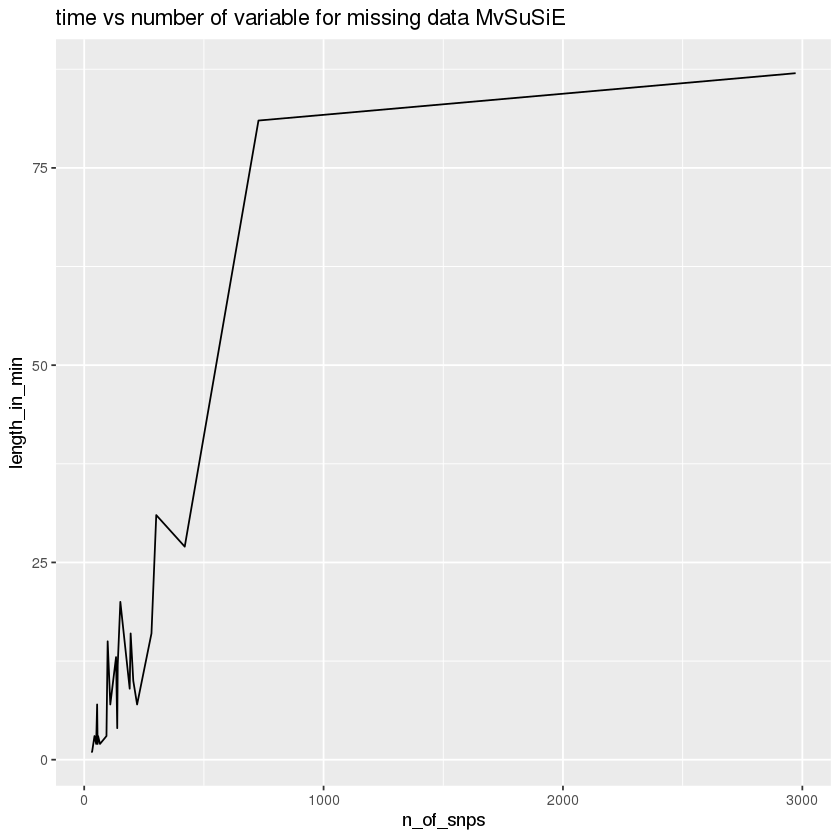

In [50]:
result%>%ggplot(aes(y = length_in_min, x = n_of_snps))+geom_line()+ggtitle("time vs number of variable for missing data MvSuSiE")

In [ ]:
ori_data = 

### Univariate analysis

In [3]:
gene_list = read_delim("/mnt/mfs/statgen/susie_missing/analysis_unit_multi","\t",col_names = F)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)




In [5]:
gene_list = gene_list%>%mutate(uni_fit_file = str_replace(X1,".filtered.",".fit."), uni_fit_path = map_chr(uni_fit_file, ~paste(c("/mnt/mfs/statgen/susie_missing/cache/",.x),collapse = "")))

In [11]:
uni_dat = gene_list%>%mutate(uni_model = map(uni_fit_path,~readRDS(.x)))

In [12]:
t = uni_dat$uni_model[[1]]

In [125]:
colnames(analys$Y[[1]])[1]

[1] "Adipose_Subcutaneous"

In [128]:

merge = function(t){
a = (t[[1]])$fitted%>%as_tibble(rownames = "SNP")
colnames(a)[2] = colnames(analys$Y[[1]])[1]
for(i in 2:49){
a_i = t[[i]]$fitted%>%as_tibble(rownames = "SNP")
colnames(a_i)[2] = colnames(analys$Y[[1]])[i]
a = full_join(a,a_i)
}
return(a)    
}

In [117]:
list_cs = map(t,~names(.x$X_column_scale_factors[unlist(.x$sets$cs)]))

In [29]:
gene_list

X1,uni_fit_file,uni_fit_path
<chr>,<chr>,<chr>
ENSG00000025772.7.filtered.rds,ENSG00000025772.7.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000025772.7.fit.rds
ENSG00000064012.21.filtered.rds,ENSG00000064012.21.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000064012.21.fit.rds
ENSG00000089486.16.filtered.rds,ENSG00000089486.16.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000089486.16.fit.rds
ENSG00000104472.9.filtered.rds,ENSG00000104472.9.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000104472.9.fit.rds
ENSG00000108384.14.filtered.rds,ENSG00000108384.14.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000108384.14.fit.rds
ENSG00000112977.15.filtered.rds,ENSG00000112977.15.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000112977.15.fit.rds
ENSG00000120088.14.filtered.rds,ENSG00000120088.14.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000120088.14.fit.rds
ENSG00000135744.7.filtered.rds,ENSG00000135744.7.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000135744.7.fit.rds
ENSG00000136059.14.filtered.rds,ENSG00000136059.14.fit.rds,/mnt/mfs/statgen/susie_missing/cache/ENSG00000136059.14.fit.rds


In [30]:
uni_dat  = uni_dat%>%mutate(cs = map(uni_model,~map(.x,~names(.x$X_column_scale_factors[unlist(.x$sets$cs)]))))

In [46]:
uni_dat$cs[[2]]

[[1]]
 [1] "chr2_201277115_T_C_b38"                 
 [2] "chr2_201286716_G_C_b38"                 
 [3] "chr2_201288355_T_G_b38"                 
 [4] "chr2_201298760_G_A_b38"                 
 [5] "chr2_201302928_G_T_b38"                 
 [6] "chr2_201319442_C_T_b38"                 
 [7] "chr2_201258272_A_G_b38"                 
 [8] "chr2_201261892_A_G_b38"                 
 [9] "chr2_201279205_T_C_b38"                 
[10] "chr2_201286440_A_G_b38"                 
[11] "chr2_201287768_T_A_b38"                 
[12] "chr2_201288502_C_A_b38"                 
[13] "chr2_201288961_C_T_b38"                 
[14] "chr2_201289197_A_G_b38"                 
[15] "chr2_201300483_T_C_b38"                 
[16] "chr2_201311301_T_C_b38"                 
[17] "chr2_201311571_A_G_b38"                 
[18] "chr2_201316524_C_T_b38"                 
[19] "chr2_201319608_C_T_b38"                 
[20] "chr2_201331340_C_A_b38"                 
[21] "chr2_201334732_A_G_b38"                 
[22] "chr2_201335101_C_T_b38"                 
[23] "chr2_201335608_C_G_b38"                 
[24] "chr2_201338512_G_A_b38"                 
[25] "chr2_201346720_C_T_b38"                 
[26] "chr2_201346972_G_A_b38"                 
[27] "chr2_201348659_C_A_b38"                 
[28] "chr2_201349425_C_T_b38"                 
[29] "chr2_201350445_C_G_b38"                 
[30] "chr2_201350686_C_CAAAACAAAACAAAACAA_b38"
[31] "chr2_201350769_C_G_b38"                 
[32] "chr2_201351938_G_C_b38"                 
[33] "chr2_201354316_A_G_b38"                 
[34] "chr2_201355900_T_C_b38"                 
[35] "chr2_201356718_T_A_b38"                 
[36] "chr2_201357784_G_T_b38"                 
[37] "chr2_201358706_T_C_b38"                 
[38] "chr2_201358843_A_G_b38"                 
[39] "chr2_201362826_T_C_b38"                 
[40] "chr2_201362917_G_C_b38"                 
[41] "chr2_201364502_A_C_b38"                 
[42] "chr2_201367601_T_TG_b38"                
[43] "chr2_201369342_A_G_b38"                 
[44] "chr2_201370625_A_G_b38"                 
[45] "chr2_201372123_C_A_b38"                 
[46] "chr2_201372558_C_T_b38"                 
[47] "chr2_201373609_C_T_b38"                 
[48] "chr2_201374076_T_C_b38"                 
[49] "chr2_201374141_G_A_b38"                 
[50] "chr2_201374389_G_C_b38"                 
[51] "chr2_201376603_AG_A_b38"                
[52] "chr2_201376871_A_G_b38"                 

[[2]]
[1] "chr2_201286716_G_C_b38" "chr2_201288355_T_G_b38" "chr2_201298760_G_A_b38"
[4] "chr2_201300114_A_C_b38" "chr2_201302928_G_T_b38"

[[3]]
 [1] "chr2_201280889_C_T_b38"  "chr2_201288355_T_G_b38" 
 [3] "chr2_201296310_T_C_b38"  "chr2_201298088_A_G_b38" 
 [5] "chr2_201298760_G_A_b38"  "chr2_201302928_G_T_b38" 
 [7] "chr2_201303108_C_CA_b38" "chr2_201304409_T_C_b38" 
 [9] "chr2_201315768_T_C_b38"  "chr2_201321699_G_C_b38" 

[[4]]
[1] "chr2_201286769_C_T_b38"     "chr2_201289674_C_G_b38"    
[3] "chr2_201292069_CAGGG_C_b38" "chr2_201306850_C_G_b38"    
[5] "chr2_201328740_A_G_b38"    

[[5]]
character(0)

[[6]]
[1] "chr2_201279041_G_A_b38" "chr2_201279332_A_C_b38" "chr2_201289674_C_G_b38"
[4] "chr2_201306850_C_G_b38" "chr2_201328740_A_G_b38"

[[7]]
character(0)

[[8]]
 [1] "chr2_201258756_TATTCTGTC_T_b38" "chr2_201259779_G_T_b38"        
 [3] "chr2_201260274_T_C_b38"         "chr2_201261892_A_G_b38"        
 [5] "chr2_201263224_A_C_b38"         "chr2_201265585_A_C_b38"        
 [7] "chr2_201279205_T_C_b38"         "chr2_201286440_A_G_b38"        
 [9] "chr2_201288502_C_A_b38"         "chr2_201288961_C_T_b38"        
[11] "chr2_201289197_A_G_b38"         "chr2_201311301_T_C_b38"        
[13] "chr2_201311571_A_G_b38"         "chr2_201316524_C_T_b38"        
[15] "chr2_201319608_C_T_b38"        

[[9]]
character(0)

[[10]]
 [1] "chr2_201258756_TATTCTGTC_T_b38" "chr2_201259779_G_T_b38"        
 [3] "chr2_201260274_T_C_b38"         "chr2_201263224_A_C_b38"        
 [5] "chr2_201265585_A_C_b38"         "chr2_201279205_T_C_b38"

### MV analysis

In [39]:
gene_list = gene_list%>%mutate(mv_path = str_replace(uni_fit_path,"cache/","")%>%str_replace("fit.rds", "filtered_SuSiE_missing.mvsusie.rds"))
mv_dat = gene_list%>%mutate(mv_model = map(mv_path,~readRDS(.x)%>%tryCatch(error = function(e) return(NA))))

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/susie_missing/ENSG00000025772.7.filtered_SuSiE_missing.mvsusie.rds', probable reason 'No such file or directory'”


In [ ]:
mv_dat = mv_dat%>%mutate()

In [45]:
mv_dat$mv_model[[2]]$variable_names[(mv_dat$mv_model[[2]])$sets$cs%>%unlist]

[1] "chr2_201450110_C_T_b38" "chr2_201149515_G_C_b38" "chr2_201150305_G_T_b38"
 [4] "chr2_201152357_T_C_b38" "chr2_201153137_G_T_b38" "chr2_201157024_T_C_b38"
 [7] "chr2_201157804_G_C_b38" "chr2_201158437_G_A_b38" "chr2_201164988_G_A_b38"
[10] "chr2_201165080_A_G_b38" "chr2_201166793_T_C_b38" "chr2_201166975_G_A_b38"
[13] "chr2_201167704_A_G_b38"

In [47]:
mv_dat%>%saveRDS("/mnt/mfs/statgen/susie_missing/susie_missing_mv_model.rds")
uni_dat%>%saveRDS("/mnt/mfs/statgen/susie_missing/susie_missing_uni_model.rds")

### Accuracy analysis

[1] "Number of components in the mixture prior: 19"


In [60]:
ori_dat = gene_list%>%mutate(ori_dat_path = map(X1,~readRDS(str_replace(.x,"EN","/mnt/mfs/statgen/susie_missing/output/EN"))))

In [69]:
ori_dat = ori_dat%>%mutate(ftrX = map(ori_dat_path,~.x$X),Y = map(ori_dat_path,~.x$y_res))

In [75]:
analys = inner_join(ori_dat,mv_dat[2:nrow(mv_dat),])

Joining, by = c("X1", "uni_fit_file", "uni_fit_path", "mv_path")



In [76]:
analys = inner_join(analys, uni_dat)

Joining, by = c("X1", "uni_fit_file", "uni_fit_path")



In [112]:
analys = analys%>%mutate(mv_fitted = map(mv_model,~.x$fitted),
                mv_r2 = map2(Y,mv_fitted,~compute_r2(.x,.y)),
                mv_pval = map2(Y,mv_fitted,~compute_pval(.x,.y))
                )

In [152]:
dim(analys$uni_fitted[[1]][,2:50]%>%as.matrix)
dim(analys$Y[[1]])

[1] 838  49

[1] 838  49

In [153]:
compute_pval(analys$Y[[1]],analys$uni_fitted[[1]][,2:50]%>%as.matrix)

Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”


[1] 0.847042079 0.043942828 0.706850774 0.435721991 0.931283631 0.745425262
 [7] 0.424854228 0.051704491 0.743403274 0.097097499 0.008897519 0.645466787
[13] 0.826275600 0.831228472 0.652036314 0.700712405 0.111367493 0.543482221
[19]         NaN 0.634366217 0.723423199 0.875398878 0.997185064 0.103392119
[25] 0.411475883 0.767429077 0.162979191 0.310708944 0.943737349 0.145920962
[31] 0.004864059 0.505209594 0.085413023 0.034708013 0.337320116 0.824000628
[37] 0.750024763 0.243357209 0.023999052 0.721417897 0.520410350 0.622955468
[43] 0.848705333 0.322450900 0.101612309 0.209667251 0.437812387 0.363300114
[49] 0.509183793

In [136]:
uni_fitted = list()
for(j in 1:nrow(analys) ){
    print(j)
    uni_fitted[[j]] = tryCatch(merge(analys$uni_model[[j]]),error = function(e) return(NA))
}
j



[1] 1


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 2


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 3


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 4


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 5


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 6


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"



[1] 7


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 8


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 9


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 10


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 11


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"



[1] 12


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 13


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 14


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 15


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 16


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 17


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 18


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 19


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"



[1] 20


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 21


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 22


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 23


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 24


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 25


Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by = "SNP"

Joining, by =

[1] 25

In [139]:
analys = analys%>%mutate(uni_fitted = uni_fitted)


In [138]:
analys = analys%>%mutate(uni_pval = map2(Y,unifitted,~))

[1] 25

In [155]:
analys = analys%>%mutate(
                uni_r2 = map2(Y,uni_fitted,~compute_r2(.x,.y)%>%tryCatch(error = function(e) return(NA))),
                uni_pval = map2(Y,uni_fitted,~compute_pval(.x,.y[,2:50]%>%as.matrix)%>%tryCatch(error = function(e) return(NA)))
                )

Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(lm(fitted[, k] ~ raw[, k])):
“essentially perfect fit: summary may be unre

In [182]:
analys = analys%>%mutate(uni_sig = map_dbl(uni_pval,~(.x%>%unlist%>%na.omit < 0.05)%>%sum), mv_sig = map_dbl(mv_pval, ~sum(.x%>%na.omit()%>%unlist() < 0.05) ))

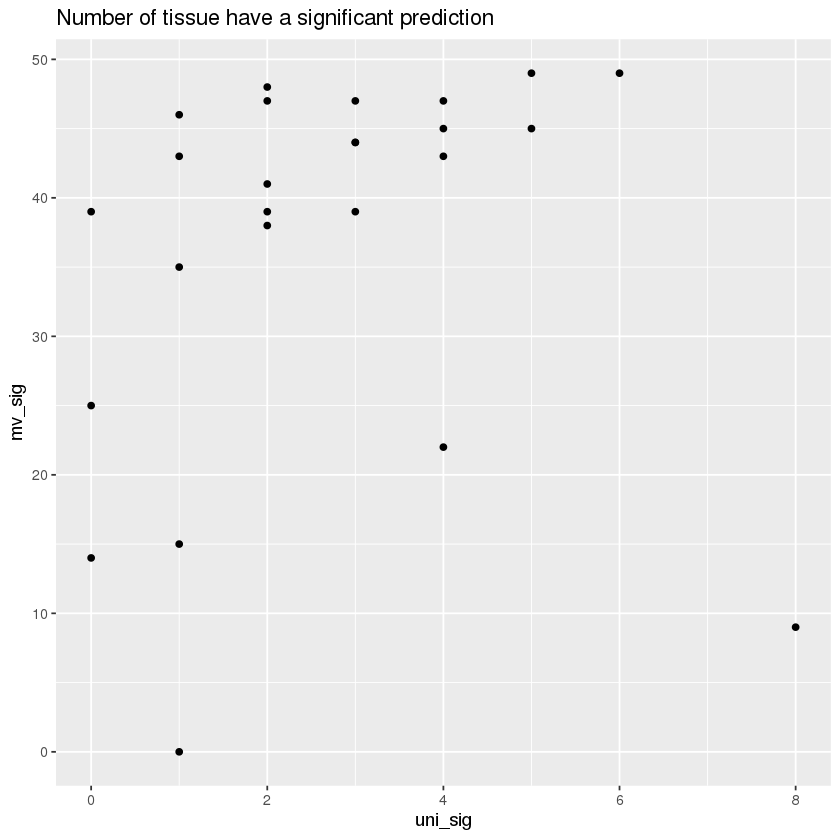

In [185]:
analys%>%select(X1,uni_sig ,mv_sig )%>%na.omit%>%ggplot(aes(x = uni_sig, y = mv_sig))+geom_point()+ggtitle("Number of tissue have a significant prediction")

In [101]:
compute_pval((analys$mv_model[[1]])$fitted,analys$Y[[1]])

[1] 5.109799e-18 1.332391e-15 2.611483e-07 6.650071e-07 1.956763e-02
 [6] 5.515991e-07 3.179322e-04 5.086756e-06 2.616945e-03 3.667233e-05
[11] 9.258113e-07 1.011988e-07 4.083120e-07 8.671728e-04 2.925761e-02
[16] 1.492291e-04 9.112585e-03 3.015822e-02 6.016352e-01 9.988128e-14
[21] 1.335970e-23 5.866116e-01 1.349253e-04 2.606691e-09 1.100771e-04
[26] 8.988917e-15 3.677043e-06 9.584113e-06 2.658344e-04 7.136337e-01
[31] 5.267244e-03 3.228337e-14 9.637669e-07 9.740134e-13 1.100470e-12
[36] 4.243838e-02 1.085896e-08 5.667209e-10 3.712928e-01 3.207677e-21
[41] 2.449159e-21 7.726775e-03 1.123516e-09 4.925957e-08 3.175139e-06
[46] 7.625776e-09 7.115321e-05 1.986437e-02 1.513753e-11

In [91]:
dim(analys$ftrX[[1]]%>%filter_X(0.1,0.05))
dim(analys$mv_model[[1]]$coef)

[1] 838 140

[1] 141  49

In [77]:
colnames(analys)

[1] "X1"           "uni_fit_file" "uni_fit_path" "mv_path"      "ori_dat_path"
 [6] "ftrX"         "Y"            "mv_model"     "uni_model"    "cs"

In [ ]:
  plink --bfile ../cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000000419.merged --out sex_test --r2 square --allow-no-sex

In [78]:
    compute_r2 = function(raw,fitted){
      r2 = rep(0,ncol(raw))
      for (j in 1:ncol(raw)){
       r2[j] = summary(lm( fitted[,j] ~ raw[,j] ))$adj.r.sq
      }
      return(r2)
    }
    
    compute_pval = function(raw,fitted){
      pval = rep(0,ncol(raw))
      for (k in 1:ncol(raw)){
        pval[k] = summary(lm( fitted[,k] ~ raw[,k] ))$coef[2,4]
      }
      return(pval)
    }

In [86]:
predict.mvsusie = function (object, newx) 
{
    s <- object
    for (i in 1:ncol(s$coef)) {
        if (i == 1) {
            res <- s$intercept[i] + newx %*% s$coef[-1, i]
        }
        else if (i > 1) {
            res <- cbind(res, s$intercept[i] + newx %*% s$coef[-1, 
                i])
        }
    }
    return(res)
}

   compute_maf <- function(geno){
      f <- mean(geno,na.rm = TRUE)/2
      return(min(f, 1-f))
    }

    compute_missing <- function(geno){
      miss <- sum(is.na(geno))/length(geno)
      return(miss)
    }
    
    mean_impute <- function(geno){
      f <- apply(geno, 2, function(x) mean(x,na.rm = TRUE))
      for (i in 1:length(f)) geno[,i][which(is.na(geno[,i]))] <- f[i]
      return(geno)
    }

    is_zero_variance <- function(x) {
      if (length(unique(x))==1) return(T)
      else return(F)
    }
  
    filter_X <- function(X, missing_rate_thresh, maf_thresh) {
        rm_col <- which(apply(X, 2, compute_missing) > missing_rate_thresh)
        if (length(rm_col)) X <- X[, -rm_col]
        rm_col <- which(apply(X, 2, compute_maf) < maf_thresh)
        if (length(rm_col)) X <- X[, -rm_col]
        rm_col <- which(apply(X, 2, is_zero_variance))
        if (length(rm_col)) X <- X[, -rm_col]
        return(mean_impute(X))
    }

In [195]:
sample_size  = ori_dat$Y[[3]]%>%apply( 2, compute_missing)*838

In [199]:
a = tibble(name = sample_size%>%names,sample_size)

In [191]:
nrow(ori_dat$Y[[1]])

[1] 838

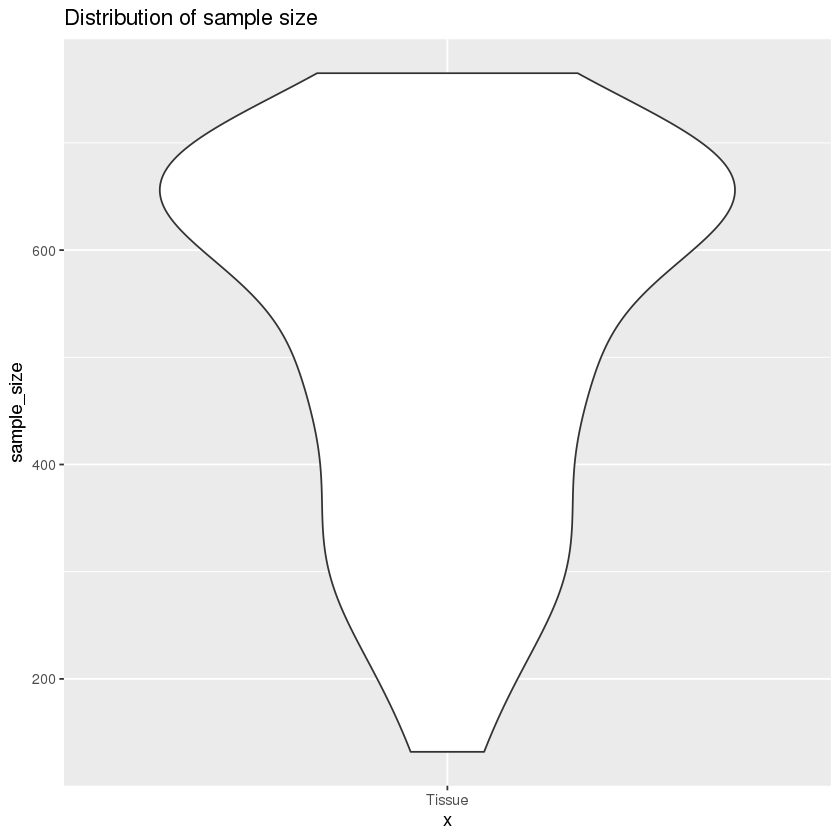

In [205]:
a%>%ggplot(aes(x = "Tissue",y = sample_size))+geom_violin()+ggtitle("Distribution of sample size")

In [208]:
13853-(5234+1751+1074+984+843)

[1] 3967